# Steepest Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from numpy import linalg as LA
from sympy import Matrix 
#found this last one on https://stackoverflow.com/questions/5889142/python-numpy-scipy-finding-the-null-space-of-a-matrix

# Problem 2.1 from section 12.2 in text

Use the steepest-descent method to minimize $f(x_1, x_2) = 4x_1^2 + 2x_2^2+4x_1 x_2 - 3x_1$ starting from the point $(2,2)^T$. 

In [2]:
x,y,z = symbols('x y z', real = True);

Input your function and x0 (as ```np.array([])```)

In [3]:
f = .5*x**2-.5*z**2+4*x*y+3*x*z-2*y*z
x0 = np.array([1,1,1])

Evaluate your function at $x_0$ using the lambdify function. 

In [4]:
eval_f = lambdify([x,y,z],f)
f_at_pt = np.array(eval_f(x0[0], x0[1],x0[2]))
print(f_at_pt)

5.0


Evaluate the gradient using the lambdify function as before.

In [7]:
grad = derive_by_array(f,(x,y,z))
eval_grad = lambdify([x,y,z],grad)
gradf = np.array(eval_grad(x0[0],x0[1],x0[2]))
gradf

array([8., 2., 0.])

# Your Turn:

What is the descent direction $p$ for steepest descent? Set $p$ equal to what we discussed in class here. 

In [6]:
p=-gradf

Now, come up with a Steepest Descent algorithm that will solve the function above. Ensure you store your $x_i$ in a list. For example, you can start with ```x_values = []``` and append as you go through iterations with ```x_values.append(x)```. The solution is $(0.75, 0.75)$. Recall that your stopping condition is to check if the norm of the gradient is less than some tolerance (close to 0). To help you in your program, here is the alpha function we came up with last class:

In [7]:
#line search to ensure that alpha is not too small
def Check_Alpha(x, mu, p): 
    i = 0;  #initialize
    alpha = 2**(-i) #multiplier
    x_new = x+alpha* p 
    gradf = np.array(eval_grad(x[0],x[1],x[2]))
    
    while np.array(eval_f(x_new[0],x_new[1],x_new[2])) > np.array(eval_f(x[0],x[1],[x[2]]))+ mu* alpha* np.matmul(p, gradf):
        i = i+1;
        alpha = 2**(-i)
        x_new = x + alpha* p 
    return alpha

In [8]:
LA.norm(gradf)

26.40075756488817

In [9]:
def Steepest_Descent(x, p, gradf, tol):
    x_values=[]
    while LA.norm(gradf)>tol:
        #find my alpha via line search
        alpha = Check_Alpha(x, .5, p)
        x = x+alpha*p #update x
        #update gradient with new x
        gradf = np.array(eval_grad(x[0],x[1]))
        p = -gradf
        #Return your x values and append all them so you are showing all of them. See prompt
        x_values.append(x)
    return x_values

In [11]:
x_values=Steepest_Descent(x0,p,gradf,.000001)
x_values
#must be named this due to plotting function calling it this

[array([0.6875, 1.    ]),
 array([0.28125 , 0.578125]),
 array([0.0859375, 0.1484375]),
 array([ 0.515625 , -0.0859375]),
 array([ 0.41796875, -0.30078125]),
 array([ 0.6328125 , -0.41796875]),
 array([ 0.58398438, -0.52539062]),
 array([ 0.69140625, -0.58398438]),
 array([ 0.66699219, -0.63769531]),
 array([ 0.72070312, -0.66699219]),
 array([ 0.70849609, -0.69384766]),
 array([ 0.73535156, -0.70849609]),
 array([ 0.72924805, -0.72192383]),
 array([ 0.74267578, -0.72924805]),
 array([ 0.73962402, -0.73596191]),
 array([ 0.74633789, -0.73962402]),
 array([ 0.74481201, -0.74298096]),
 array([ 0.74816895, -0.74481201]),
 array([ 0.74740601, -0.74649048]),
 array([ 0.74908447, -0.74740601]),
 array([ 0.748703  , -0.74824524]),
 array([ 0.74954224, -0.748703  ]),
 array([ 0.7493515 , -0.74912262]),
 array([ 0.74977112, -0.7493515 ]),
 array([ 0.74967575, -0.74956131]),
 array([ 0.74988556, -0.74967575]),
 array([ 0.74983788, -0.74978065]),
 array([ 0.74994278, -0.74983788]),
 array([ 0.749

# Visualizing with Plot

Running the below code will plot your ```x_values``` based on what you got from your steepest descent algorithm.

In [43]:
#set up x1 and x2 values:
x = np.linspace(-2.5, 2.5, 100)
y = np.linspace(-2.5, 2.5, 100)
X,Y = np.meshgrid(x, y) #creates all possibilities for x and y on which to plot the 3rd dimension
f = 4*X**2+2*Y**2+4*X*Y-3*X

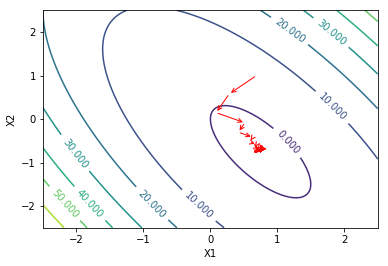

In [44]:
x_values = np.array(x_values) #convert to numpy array
for i in range(len(x_values) - 1):
    plt.annotate('', xy=x_values[i+1, :], xytext=x_values[i, :],arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
        va='center', ha='center') #annotates each arrow based on the row of the x_values
cp = plt.contour(X, Y, f) #plots the contour map
plt.clabel(cp, inline=1, fontsize=10) #labels the level curves
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()